# Homework 3: Due Sunday 11:59pm

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset.

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion and lecture materials are also allowed.

In [119]:
!git clone https://github.com/ucsd-cse151a-f24/hw3.git

fatal: destination path 'hw3' already exists and is not an empty directory.


# Exercises
## Exercise 1 - Agglomerative Clustering (20 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (5 points)

 - Explain why you would pick these parameters.
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be?

Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

In [120]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

df = pd.read_csv('./hw3/bitstrings.csv') # change filename location based on your setup

In [121]:
print(df.columns)  # Display column names

Index(['b15', 'b14', 'b13', 'b12', 'b11', 'b10', 'b9', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'b0'],
      dtype='object')


In [122]:
# Combine bit columns into full bitstrings and convert to list of lists
bitstrings = df.apply(lambda row: row.tolist(), axis=1).tolist()

In [123]:
# Define the custom distance function (Hamming distance)
def hamming_distance(u, v):
    return sum(abs(ui - vi) for ui, vi in zip(u, v))

In [124]:
# Compute the condensed distance matrix
distance_matrix = squareform(pdist(bitstrings, metric=hamming_distance))

In [125]:
# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(
    metric='precomputed',
    linkage='single',
    distance_threshold=1,
    n_clusters=None
)

In [126]:
# Fit the model
clustering.fit(distance_matrix)

AgglomerativeClustering(distance_threshold=1, linkage='single',
                        metric='precomputed', n_clusters=None)

In [127]:
# Get cluster labels and the number of clusters
labels = clustering.labels_
num_clusters = len(set(labels))

In [128]:
print(f'Number of equivalence classes (clusters): {num_clusters}')

Number of equivalence classes (clusters): 784


### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (15 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints:
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

In [129]:
import matplotlib.pyplot as plt
import numpy as np

In [130]:
# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(
    metric='precomputed',
    linkage='single',
    distance_threshold=1.01,  # Slightly higher than 1
    n_clusters=None
)

In [131]:
# Fit the model
clustering.fit(distance_matrix)

AgglomerativeClustering(distance_threshold=1.01, linkage='single',
                        metric='precomputed', n_clusters=None)

In [132]:
# Get cluster labels
labels = clustering.labels_

In [133]:
# Count members in each cluster
unique, counts = np.unique(labels, return_counts=True)

In [134]:
# Display frequency of each cluster
print("Cluster Frequencies:")
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} members")

Cluster Frequencies:
Cluster 0: 193 members
Cluster 1: 100 members
Cluster 2: 187 members
Cluster 3: 99 members
Cluster 4: 296 members
Cluster 5: 194 members
Cluster 6: 100 members
Cluster 7: 2 members
Cluster 8: 3 members
Cluster 9: 1 members
Cluster 10: 3 members
Cluster 11: 1 members
Cluster 12: 2 members
Cluster 13: 1 members
Cluster 14: 1 members
Cluster 15: 1 members
Cluster 16: 1 members
Cluster 17: 1 members
Cluster 18: 1 members
Cluster 19: 1 members
Cluster 20: 1 members
Cluster 21: 1 members
Cluster 22: 1 members
Cluster 23: 1 members
Cluster 24: 1 members
Cluster 25: 1 members
Cluster 26: 1 members
Cluster 27: 1 members
Cluster 28: 1 members
Cluster 29: 1 members
Cluster 30: 1 members
Cluster 31: 1 members


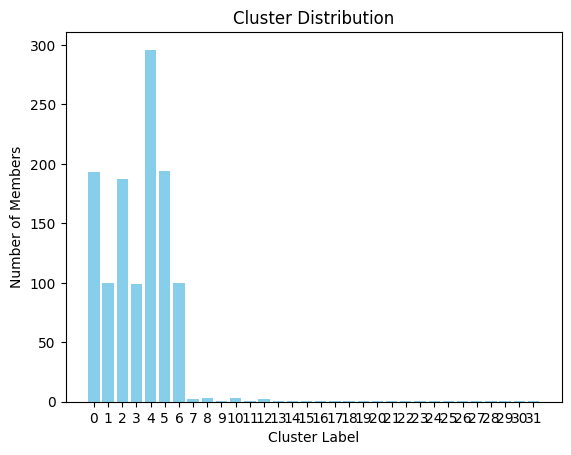

In [135]:
# Create a bar chart for cluster frequencies
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Members')
plt.title('Cluster Distribution')
plt.xticks(unique)
plt.show()

## Exercise 2 - K-Means Clustering (20 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

In [136]:
from sklearn.cluster import KMeans

In [137]:
# Use the number of clusters from Exercise 1
num_clusters = len(unique)

In [138]:
# Convert bitstrings to numpy array
bitstrings_array = np.array(bitstrings)

In [139]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(bitstrings_array)

KMeans(n_clusters=32, n_init=10, random_state=42)

In [140]:
# Get cluster labels
kmeans_labels = kmeans.labels_

In [141]:
# Count members in each cluster
kmeans_unique, kmeans_counts = np.unique(kmeans_labels, return_counts=True)

In [142]:
# Display frequency of each cluster
print("K-Means Cluster Frequencies:")
for cluster, count in zip(kmeans_unique, kmeans_counts):
    print(f"Cluster {cluster}: {count} members")

K-Means Cluster Frequencies:
Cluster 0: 100 members
Cluster 1: 89 members
Cluster 2: 61 members
Cluster 3: 100 members
Cluster 4: 51 members
Cluster 5: 31 members
Cluster 6: 18 members
Cluster 7: 61 members
Cluster 8: 16 members
Cluster 9: 17 members
Cluster 10: 14 members
Cluster 11: 15 members
Cluster 12: 70 members
Cluster 13: 22 members
Cluster 14: 10 members
Cluster 15: 60 members
Cluster 16: 72 members
Cluster 17: 21 members
Cluster 18: 91 members
Cluster 19: 24 members
Cluster 20: 50 members
Cluster 21: 56 members
Cluster 22: 16 members
Cluster 23: 13 members
Cluster 24: 26 members
Cluster 25: 14 members
Cluster 26: 16 members
Cluster 27: 9 members
Cluster 28: 10 members
Cluster 29: 17 members
Cluster 30: 16 members
Cluster 31: 14 members


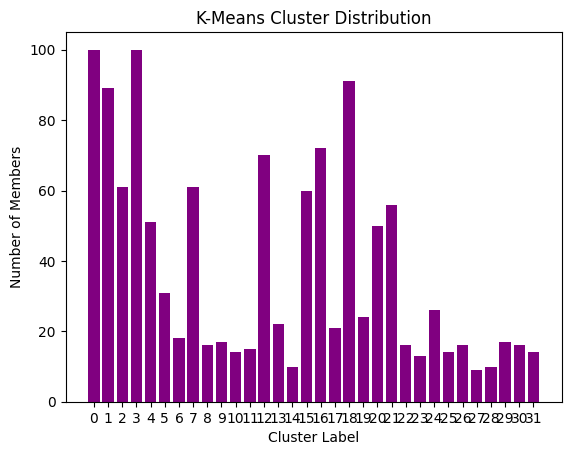

In [143]:
# Create a bar chart for K-Means cluster frequencies
plt.bar(kmeans_unique, kmeans_counts, color='purple')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Members')
plt.title('K-Means Cluster Distribution')
plt.xticks(kmeans_unique)
plt.show()

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

**Ans:** The results of Agglomerative Clustering and K-Means Clustering differ mainly in the distribution of cluster sizes. Agglomerative Clustering tends to create many small clusters, some with only 1 or 2 members, due to its hierarchical nature and distance threshold setting, which prevents merging of clusters that aren't highly similar. In contrast, K-Means produces more evenly sized clusters, as it minimizes the within-cluster variance and optimizes for balanced groupings. This difference arises because Agglomerative Clustering merges clusters based on proximity, potentially leaving small, isolated clusters, while K-Means forces a more compact, uniform distribution of points around centroids. Thus, Agglomerative Clustering may reflect subtle, natural divisions in the data, whereas K-Means balances the clusters by their sizes.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [144]:
# Assuming the dataset has already been loaded as `df` with columns ['b15', 'b14', ..., 'b0']
# Convert bitstrings (columns 'b15', 'b14', ..., 'b0') into a numeric format
X = df.values

In [145]:
# Perform K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [146]:
# Get cluster labels
labels = kmeans.labels_

In [147]:
# Count the number of members in each cluster
cluster_frequencies = pd.Series(labels).value_counts().sort_index()

In [148]:
# Display the frequencies of each cluster
print("K-Means Cluster Frequencies (k=2):")
print(cluster_frequencies)

K-Means Cluster Frequencies (k=2):
0    416
1    784
Name: count, dtype: int64


### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

In [149]:
from sklearn.decomposition import PCA

In [150]:
# Perform PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

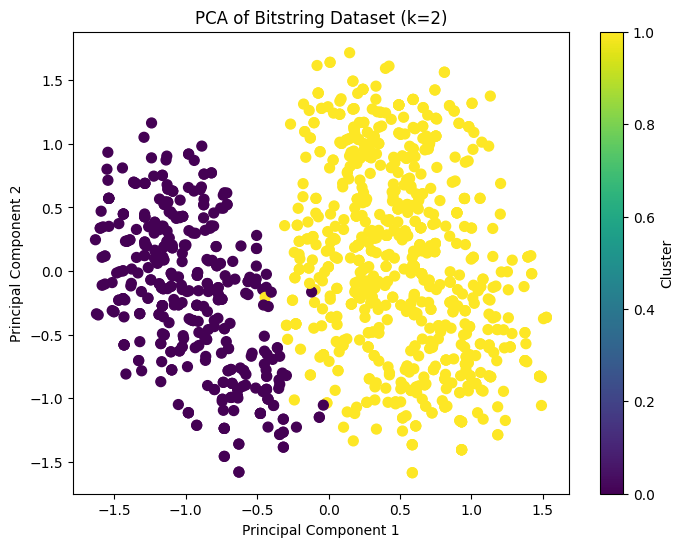

In [151]:
# Create a scatter plot of the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('PCA of Bitstring Dataset (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [152]:
# Print the weights of all features in the first principal component
print("Weights of features in the first principal component:")
for feature, weight in zip(df.columns, pca.components_[0]):
    print(f'{feature}: {weight}')

Weights of features in the first principal component:
b15: -0.32144120397408893
b14: 0.306035220769424
b13: 0.10219611964139866
b12: -0.02701849205851499
b11: 0.0005051594765333178
b10: 0.2510021499401475
b9: 0.41279826533806047
b8: 0.4136749328573846
b7: -0.34530210252955595
b6: -0.25305536175429355
b5: 0.11678812402869743
b4: 0.04711134934672556
b3: 0.1934438271313368
b2: 0.01279818295927529
b1: 0.006563958836303124
b0: -0.3880146405470465


In [153]:
# Report the feature with the highest positive weight in the first principal component
max_weight_feature = df.columns[pca.components_[0].argmax()]
print(f"The feature with the highest positive weight in the first principal component is: {max_weight_feature}")

The feature with the highest positive weight in the first principal component is: b8


## Exercise 4 - Singular Value Decomposition (30 points in total)

Let's decompose our data set into left and right matrices to find unknown structure in our data

### Exercise 4.1 - Generate the [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (10 points)

 - Generate multiple SVD's using 2, 3 and 4 components ```k=2, k=3 and k=4```.
 Give each SVD it's own python variable.
 - Calculate a pairwise cosine similarity of our kxn matrix for n features (should result in an nxn matrix)
 - Generate Pair plots for the left and right matrices.
 - Evaluate your results and what can you extract from the results of k=2, k=3 and k=4 dimensional reductions?

**Before performing SVD, let's first calculate our Eigen values and Eigen vectors of our matrix**

In [154]:
eigen_values, eigen_vectors = np.linalg.eig(np.array(df).T @ np.array(df))

In [155]:
# Let's evaluate our values. You can use this for your final evaluation for 4.1
# eigen_values
print("Eigenvalues:", eigen_values)
print("Eigenvectors:", eigen_vectors)

Eigenvalues: [5560.91998098  774.88748042  586.3344905   473.08470787  333.56242611
  302.35801968  267.84917439  250.33232478  210.71729272  173.17591399
  143.04620217  104.01125393  128.95448083  119.45970652  113.53343526
  115.77310985]
Eigenvectors: [[-0.22473808  0.3400016   0.32588051 -0.21646261  0.10110314 -0.28148257
  -0.23634524  0.31665258  0.16926325  0.22171711 -0.53673907  0.13952674
  -0.08985404 -0.11507625 -0.10261578  0.13432786]
 [-0.23162034 -0.29253957  0.30735134 -0.35345791  0.23999497  0.03196105
   0.23089441 -0.19725128  0.2689957   0.07510317  0.13806018 -0.38558299
   0.17629802 -0.31980463 -0.31455794 -0.1117997 ]
 [-0.12859176 -0.066576   -0.02725349  0.21949159  0.11676841 -0.24607595
   0.17929019  0.46397075 -0.13260562 -0.49089376  0.05415168 -0.38876698
  -0.37147404 -0.05423142 -0.1570953   0.17396661]
 [-0.31024377  0.09118578 -0.37740284 -0.21043448  0.26172458 -0.32396398
   0.18202653 -0.06420541  0.12658582 -0.06710905  0.02086767  0.12028933

In [156]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
# Here we generate an SVD using k = 5 yielding u,s,v of mx5, 5x5, nx5.T
svd = TruncatedSVD(n_components=5, n_iter=1000, random_state=76)

In [158]:
svd.fit(df)
print(svd.explained_variance_ratio_) # Prints the explained variance for each of the 5 components
print(svd.explained_variance_ratio_.sum()) # Prints the sum of the 5 from above
sigma_matrix = np.diag(svd.singular_values_) # Creates the sigma matrix from the singular values
print(sigma_matrix) # Prints the sigma matrix
singular_vals = svd.singular_values_ # Our singular values
print(singular_vals) # Prints singular values as a vector

[0.08953037 0.17234646 0.13028454 0.10528549 0.0741871 ]
0.5716339585594851
[[74.57157623  0.          0.          0.          0.        ]
 [ 0.         27.83680083  0.          0.          0.        ]
 [ 0.          0.         24.21434473  0.          0.        ]
 [ 0.          0.          0.         21.75051052  0.        ]
 [ 0.          0.          0.          0.         18.26369147]]
[74.57157623 27.83680083 24.21434473 21.75051052 18.26369147]


In [159]:
# Perform SVD with k=2, k=3, and k=4
svd_k2 = TruncatedSVD(n_components=2, n_iter=1000, random_state=76)
svd_k3 = TruncatedSVD(n_components=3, n_iter=1000, random_state=76)
svd_k4 = TruncatedSVD(n_components=4, n_iter=1000, random_state=76)

In [160]:
# Fit the SVD models
svd_k2.fit(df)
svd_k3.fit(df)
svd_k4.fit(df)

TruncatedSVD(n_components=4, n_iter=1000, random_state=76)

In [161]:
# Print explained variance ratios
print(f"Explained Variance Ratio for k=2: {svd_k2.explained_variance_ratio_}")
print(f"Explained Variance Ratio for k=3: {svd_k3.explained_variance_ratio_}")
print(f"Explained Variance Ratio for k=4: {svd_k4.explained_variance_ratio_}")

Explained Variance Ratio for k=2: [0.08953037 0.17234646]
Explained Variance Ratio for k=3: [0.08953037 0.17234646 0.13028454]
Explained Variance Ratio for k=4: [0.08953037 0.17234646 0.13028454 0.10528549]


In [162]:
# Print sum of explained variances
print(f"Sum of explained variance (k=2): {svd_k2.explained_variance_ratio_.sum()}")
print(f"Sum of explained variance (k=3): {svd_k3.explained_variance_ratio_.sum()}")
print(f"Sum of explained variance (k=4): {svd_k4.explained_variance_ratio_.sum()}")

Sum of explained variance (k=2): 0.26187683219943647
Sum of explained variance (k=3): 0.39216136776072985
Sum of explained variance (k=4): 0.4974468584703548


In [163]:
# We will define our cosine similarity function
def cosine_similarity(a, b):
    """Calculates the cosine similarity between two vectors."""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [164]:
right_matrix = pd.DataFrame(svd.components_)
right_matrix.shape # lets check the shape

(5, 16)

In [165]:
right_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.224738,0.231620,0.128592,0.310244,0.147987,0.243458,0.281356,0.282752,0.175377,0.322661,0.192425,0.195697,0.341603,0.281952,0.255848,0.266339
1,0.340002,-0.292540,-0.066576,0.091186,0.035265,-0.212901,-0.375147,-0.377218,0.383869,0.302709,-0.091712,-0.054918,-0.142340,0.043132,0.068585,0.423359
2,0.325881,0.307351,-0.027253,-0.377403,-0.162040,-0.059054,0.046899,0.179557,-0.065260,0.029107,-0.403549,0.552484,-0.181907,-0.097216,-0.175877,0.212853
3,0.216463,0.353458,-0.219492,0.210434,0.439688,0.286455,-0.125396,-0.001257,0.099859,-0.260307,-0.257212,-0.294463,0.102176,-0.427541,-0.117092,0.084289
4,-0.101103,-0.239995,-0.116768,-0.261725,0.054778,0.509751,-0.162442,0.225142,0.018983,0.278692,0.422142,0.115965,-0.248836,-0.407471,-0.010053,0.111304


In [166]:
# Get the right matrix (V matrix) from SVD
right_matrix_k2 = pd.DataFrame(svd_k2.components_)
right_matrix_k3 = pd.DataFrame(svd_k3.components_)
right_matrix_k4 = pd.DataFrame(svd_k4.components_)

In [167]:
right_matrix_k2.shape

(2, 16)

In [168]:
right_matrix_k3.shape

(3, 16)

In [169]:
right_matrix_k4.shape

(4, 16)

In [170]:
right_matrix_k2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.224738,0.23162,0.128592,0.310244,0.147987,0.243458,0.281356,0.282752,0.175377,0.322661,0.192425,0.195697,0.341603,0.281952,0.255848,0.266339
1,0.340002,-0.29254,-0.066576,0.091186,0.035265,-0.212901,-0.375147,-0.377218,0.383869,0.302709,-0.091712,-0.054918,-0.142340,0.043132,0.068585,0.423359


In [171]:
right_matrix_k3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.224738,0.231620,0.128592,0.310244,0.147987,0.243458,0.281356,0.282752,0.175377,0.322661,0.192425,0.195697,0.341603,0.281952,0.255848,0.266339
1,0.340002,-0.292540,-0.066576,0.091186,0.035265,-0.212901,-0.375147,-0.377218,0.383869,0.302709,-0.091712,-0.054918,-0.142340,0.043132,0.068585,0.423359
2,0.325881,0.307351,-0.027253,-0.377403,-0.162040,-0.059054,0.046899,0.179557,-0.065260,0.029107,-0.403549,0.552484,-0.181907,-0.097216,-0.175877,0.212853


In [172]:
right_matrix_k4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.224738,0.231620,0.128592,0.310244,0.147987,0.243458,0.281356,0.282752,0.175377,0.322661,0.192425,0.195697,0.341603,0.281952,0.255848,0.266339
1,0.340002,-0.292540,-0.066576,0.091186,0.035265,-0.212901,-0.375147,-0.377218,0.383869,0.302709,-0.091712,-0.054918,-0.142340,0.043132,0.068585,0.423359
2,0.325881,0.307351,-0.027253,-0.377403,-0.162040,-0.059054,0.046899,0.179557,-0.065260,0.029107,-0.403549,0.552484,-0.181907,-0.097216,-0.175877,0.212853
3,0.216463,0.353458,-0.219492,0.210434,0.439688,0.286455,-0.125396,-0.001257,0.099859,-0.260307,-0.257212,-0.294463,0.102176,-0.427541,-0.117092,0.084289


**Generate code for performing a pairwise calculation of our features using cosine_similarity**

In [173]:
from sklearn.metrics.pairwise import cosine_similarity

In [174]:
# Cosine similarity of right matrix components
cosine_sim_k2 = cosine_similarity(right_matrix_k2.T)
cosine_sim_k3 = cosine_similarity(right_matrix_k3.T)
cosine_sim_k4 = cosine_similarity(right_matrix_k4.T)

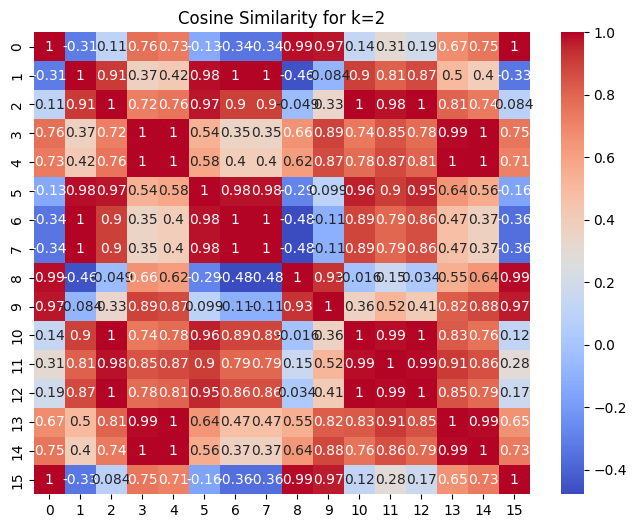

In [175]:
# Plot pairwise cosine similarity as heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_k2, annot=True, cmap='coolwarm')
plt.title('Cosine Similarity for k=2')
plt.show()

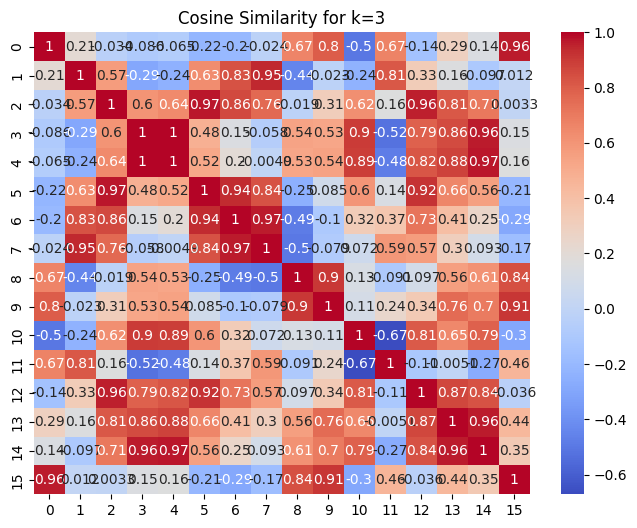

In [176]:
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_k3, annot=True, cmap='coolwarm')
plt.title('Cosine Similarity for k=3')
plt.show()

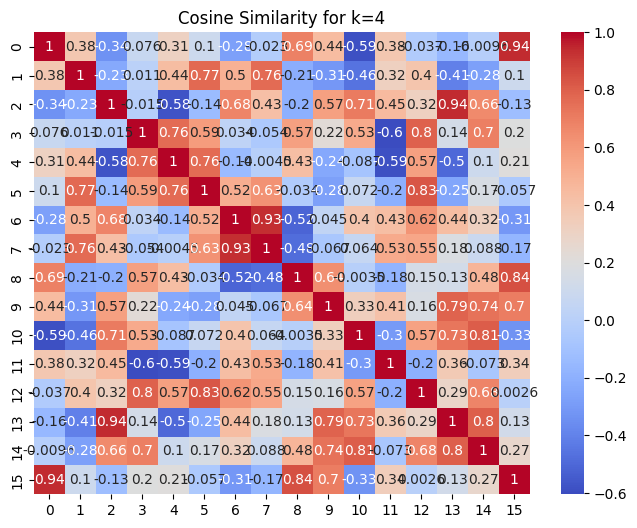

In [177]:
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_k4, annot=True, cmap='coolwarm')
plt.title('Cosine Similarity for k=4')
plt.show()

**Let's extract our left matrix** This is similar to looking at customers with similar movie viewing habits

In [178]:
left_matrix = pd.DataFrame(svd.fit_transform(df))/singular_vals
left_matrix.shape

(1200, 5)

In [179]:
left_matrix

,0,1,2,3,4
0,0.025458,-0.024985,0.005178,-0.058114,0.012221
1,0.021131,-0.035859,0.003976,-0.046146,-0.003039
2,0.017358,-0.022382,0.002039,-0.040381,0.005855
3,0.021131,-0.035859,0.003976,-0.046146,-0.003039
4,0.024396,-0.043507,0.001537,-0.032976,0.024872
...,...,...,...,...,...
1195,0.040810,-0.000530,-0.001909,0.051564,-0.028016
1196,0.037239,-0.015738,-0.010699,0.047688,-0.034110
1197,0.045137,0.010345,-0.000707,0.039596,-0.012756
1198,0.050342,0.005077,0.005444,0.014232,0.016707


In [180]:
# Get the left matrix from SVD
left_matrix_k2 = pd.DataFrame(svd_k2.fit_transform(df)) / svd_k2.singular_values_
left_matrix_k3 = pd.DataFrame(svd_k3.fit_transform(df)) / svd_k3.singular_values_
left_matrix_k4 = pd.DataFrame(svd_k4.fit_transform(df)) / svd_k4.singular_values_

In [181]:
left_matrix_k2

,0,1
0,0.025458,-0.024985
1,0.021131,-0.035859
2,0.017358,-0.022382
3,0.021131,-0.035859
4,0.024396,-0.043507
...,...,...
1195,0.040810,-0.000530
1196,0.037239,-0.015738
1197,0.045137,0.010345
1198,0.050342,0.005077


In [182]:
left_matrix_k3

,0,1,2
0,0.025458,-0.024985,0.005178
1,0.021131,-0.035859,0.003976
2,0.017358,-0.022382,0.002039
3,0.021131,-0.035859,0.003976
4,0.024396,-0.043507,0.001537
...,...,...,...
1195,0.040810,-0.000530,-0.001909
1196,0.037239,-0.015738,-0.010699
1197,0.045137,0.010345,-0.000707
1198,0.050342,0.005077,0.005444


In [183]:
left_matrix_k4

,0,1,2,3
0,0.025458,-0.024985,0.005178,-0.058114
1,0.021131,-0.035859,0.003976,-0.046146
2,0.017358,-0.022382,0.002039,-0.040381
3,0.021131,-0.035859,0.003976,-0.046146
4,0.024396,-0.043507,0.001537,-0.032976
...,...,...,...,...
1195,0.040810,-0.000530,-0.001909,0.051564
1196,0.037239,-0.015738,-0.010699,0.047688
1197,0.045137,0.010345,-0.000707,0.039596
1198,0.050342,0.005077,0.005444,0.014232


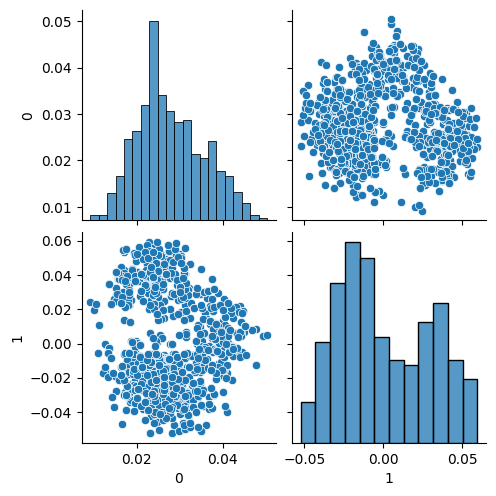

In [184]:
# Pair plots for left matrices
sns.pairplot(left_matrix_k2)
plt.show()

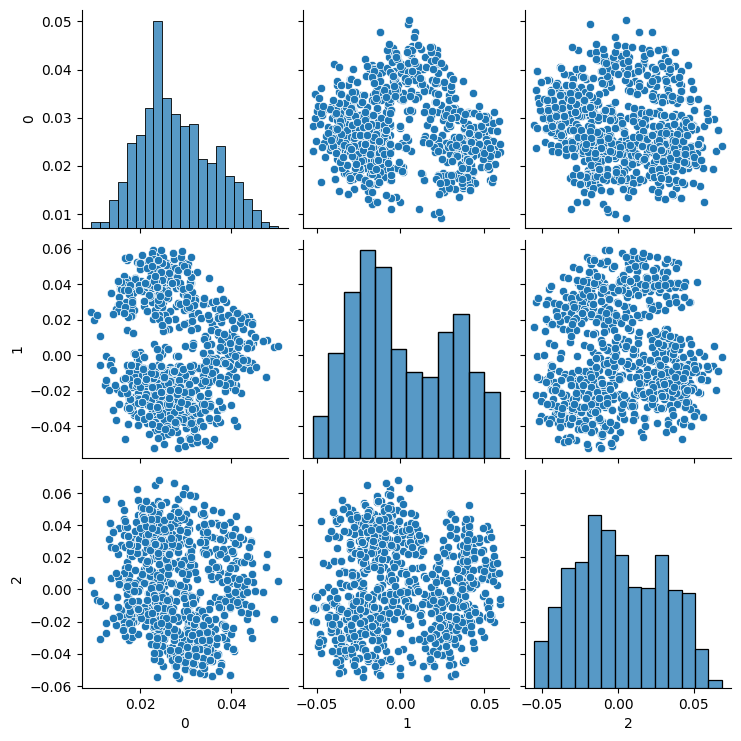

In [185]:
sns.pairplot(left_matrix_k3)
plt.show()

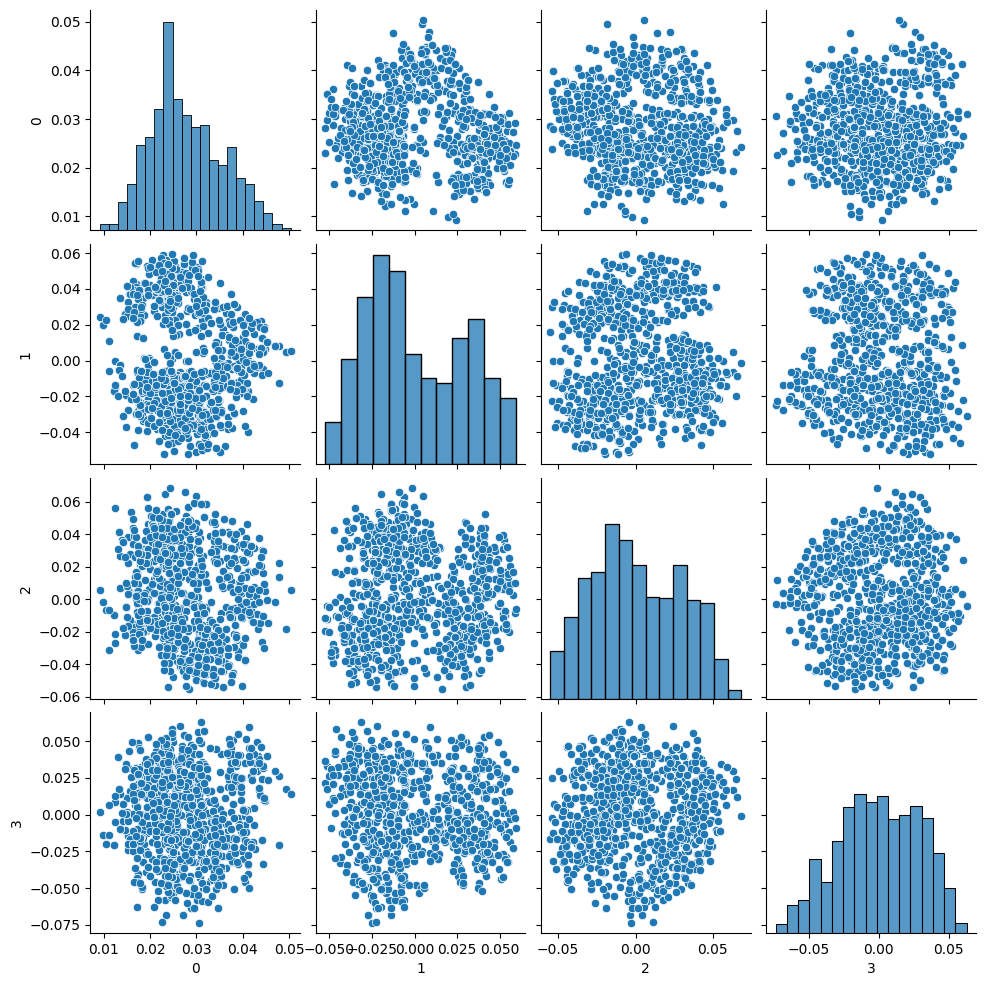

In [186]:
sns.pairplot(left_matrix_k4)
plt.show()

**Explain your interpretation for each of the SVD's you generated for k=2, 3, 4**

**k=2:** With 2 components, the explained variance is relatively low, capturing only the most dominant patterns in the data. This provides a coarse view of the underlying structure, highlighting the broadest distinctions among features or observations. It's useful for visualizing data in two dimensions but may miss finer details.

**k=3:** Adding a third component captures more variance, revealing subtler structures. This helps identify additional relationships among features that were not visible with just two components. It provides a balance between simplicity and detail, making it a good choice for slightly more nuanced analysis.

**k=4:** At 4 components, the model captures even more variance, further improving the representation of the data. However, the marginal gain in explained variance starts to diminish. This level of decomposition is ideal for uncovering complex patterns but may introduce noise or overfitting if the data doesn't have sufficient structure to justify it.

### Exercise 4.2 - Generate Clusters (10 points)

 - Re-do the k-means clustering on our dataset again for the three different components created by you above, of the left matrix.
 - Show the frequency (number of members) of each cluster.
 - Generate clusters from 2 to 10
 - Use the [silhouette](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) method to choose the best k clusters

In [187]:
from sklearn.metrics import silhouette_score

In [188]:
# Define a function for clustering and silhouette analysis
def kmeans_clustering(matrix, k_range=(2, 10)):
    silhouette_scores = []
    for k in range(k_range[0], k_range[1]+1):
        kmeans = KMeans(n_clusters=k, random_state=76)
        clusters = kmeans.fit_predict(matrix)

        # Silhouette score to evaluate the clustering
        score = silhouette_score(matrix, clusters)
        silhouette_scores.append((k, score))

        # Print the frequency of each cluster
        cluster_freq = pd.Series(clusters).value_counts()
        print(f"Cluster Frequencies for k={k}:")
        print(cluster_freq)

    return silhouette_scores

In [189]:
# Apply K-Means for k=2 to k=10 on left matrices for k=2, k=3, k=4 SVDs
print("K-Means for k=2 SVD:")
kmeans_k2_scores = kmeans_clustering(left_matrix_k2)

K-Means for k=2 SVD:
Cluster Frequencies for k=2:
0    722
1    478
Name: count, dtype: int64
Cluster Frequencies for k=3:
0    437
1    394
2    369
Name: count, dtype: int64
Cluster Frequencies for k=4:
1    353
3    334
0    291
2    222
Name: count, dtype: int64
Cluster Frequencies for k=5:
3    367
0    252
1    212
4    200
2    169
Name: count, dtype: int64
Cluster Frequencies for k=6:
3    277
0    272
5    197
1    176
2    143
4    135
Name: count, dtype: int64
Cluster Frequencies for k=7:
6    257
5    197
1    176
3    163
0    145
2    132
4    130
Name: count, dtype: int64
Cluster Frequencies for k=8:
6    221
1    208
4    181
3    146
2    132
7    114
0    104
5     94
Name: count, dtype: int64
Cluster Frequencies for k=9:
6    221
1    150
3    147
4    147
2    132
7    114
0    104
5     93
8     92
Name: count, dtype: int64
Cluster Frequencies for k=10:
6    197
3    154
9    145
2    126
5    120
7    101
0     99
8     92
4     92
1     74
Name: count, dtype: int

In [190]:
print("K-Means for k=3 SVD:")
kmeans_k3_scores = kmeans_clustering(left_matrix_k3)

K-Means for k=3 SVD:
Cluster Frequencies for k=2:
0    677
1    523
Name: count, dtype: int64
Cluster Frequencies for k=3:
1    451
0    390
2    359
Name: count, dtype: int64
Cluster Frequencies for k=4:
0    385
2    340
1    264
3    211
Name: count, dtype: int64
Cluster Frequencies for k=5:
0    339
2    295
1    253
4    158
3    155
Name: count, dtype: int64
Cluster Frequencies for k=6:
0    298
2    274
5    199
4    187
3    136
1    106
Name: count, dtype: int64
Cluster Frequencies for k=7:
2    260
5    203
0    190
6    184
4    132
3    129
1    102
Name: count, dtype: int64
Cluster Frequencies for k=8:
4    244
0    182
5    175
1    155
7    136
3    114
6    103
2     91
Name: count, dtype: int64
Cluster Frequencies for k=9:
0    179
1    176
5    174
7    135
8    129
3    110
4    104
6    103
2     90
Name: count, dtype: int64
Cluster Frequencies for k=10:
1    183
9    159
0    136
8    128
2    124
6    102
4    101
3     99
5     92
7     76
Name: count, dtype: int

In [191]:
print("K-Means for k=4 SVD:")
kmeans_k4_scores = kmeans_clustering(left_matrix_k4)

K-Means for k=4 SVD:
Cluster Frequencies for k=2:
1    605
0    595
Name: count, dtype: int64
Cluster Frequencies for k=3:
1    428
2    427
0    345
Name: count, dtype: int64
Cluster Frequencies for k=4:
2    424
1    300
3    247
0    229
Name: count, dtype: int64
Cluster Frequencies for k=5:
4    347
1    281
3    236
0    206
2    130
Name: count, dtype: int64
Cluster Frequencies for k=6:
1    272
3    223
0    202
2    197
4    175
5    131
Name: count, dtype: int64
Cluster Frequencies for k=7:
3    210
0    195
2    192
6    179
4    170
1    139
5    115
Name: count, dtype: int64
Cluster Frequencies for k=8:
4    198
6    174
2    166
3    166
0    134
1    132
7    115
5    115
Name: count, dtype: int64
Cluster Frequencies for k=9:
6    170
2    161
3    157
4    139
1    127
8    126
7    115
5    114
0     91
Name: count, dtype: int64
Cluster Frequencies for k=10:
6    171
2    159
8    126
1    124
4    116
7    115
5    102
9    101
3     95
0     91
Name: count, dtype: int

In [192]:
# Print silhouette scores for each k
print("Silhouette Scores for k=2 SVD:")
for k, score in kmeans_k2_scores:
    print(f"k={k}: {score}")
print("")
print("Silhouette Scores for k=3 SVD:")
for k, score in kmeans_k3_scores:
    print(f"k={k}: {score}")
print("")
print("Silhouette Scores for k=4 SVD:")
for k, score in kmeans_k4_scores:
    print(f"k={k}: {score}")


Silhouette Scores for k=2 SVD:
k=2: 0.6141455385235831
k=3: 0.4952789553515991
k=4: 0.44663116758597415
k=5: 0.40763872732973927
k=6: 0.3841265637486879
k=7: 0.3985123554278049
k=8: 0.38506818534914466
k=9: 0.3702789348368061
k=10: 0.3970424334402317

Silhouette Scores for k=3 SVD:
k=2: 0.33391119480897963
k=3: 0.4479078278476173
k=4: 0.4251594116472585
k=5: 0.4141556715101979
k=6: 0.37521759053813203
k=7: 0.38773305006084113
k=8: 0.3561268772476106
k=9: 0.3522594290576663
k=10: 0.34186478796489295

Silhouette Scores for k=4 SVD:
k=2: 0.23451640530312848
k=3: 0.30386702135620863
k=4: 0.3343512529319482
k=5: 0.35886080635316875
k=6: 0.3684745531357352
k=7: 0.34681457922394276
k=8: 0.3505687107821551
k=9: 0.3542073795969593
k=10: 0.3377129852900436


## Exercise 4 - Collaborative Statement (5 points)
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I worked independently on this assignment and did not collaborate with anyone. I followed the academic honesty guidelines and focused solely on my own analysis and coding practices.